# EEE21165 - Value Investing with Machine Learning

In [1]:
#!pip install yfinance
#!pip install pandas-datareader

In [2]:
#basics
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#for reading stock data from Yahoo Finance
import yfinance as yf

#for date and time checking
from datetime import datetime

In [3]:
#list of stocks to explore in this research
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

#setting end datetime and start datetime for the dataset that will be used
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)#do end.year-1 for now, change later to more past

#download dataset
for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA']

#Adding the column name on DataFrame
for comp, comp_name in zip(company_list, company_name):
    comp['Name'] = comp_name

df = pd.concat(company_list, axis = 0) #don't know if this is necessary
df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-03-26,120.349998,121.480003,118.919998,121.209999,120.493843,94071200,APPLE
2021-03-29,121.650002,122.580002,120.730003,121.389999,120.672775,80819200,APPLE
2021-03-30,120.110001,120.400002,118.860001,119.900002,119.191589,85671900,APPLE
2021-03-31,121.650002,123.519997,121.150002,122.150002,121.428299,118323800,APPLE
2021-04-01,123.660004,124.180000,122.489998,123.000000,122.273270,75089100,APPLE
...,...,...,...,...,...,...,...
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,TESLA
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,TESLA
2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,TESLA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1265 entries, 2021-03-26 to 2022-03-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1265 non-null   float64
 1   High       1265 non-null   float64
 2   Low        1265 non-null   float64
 3   Close      1265 non-null   float64
 4   Adj Close  1265 non-null   float64
 5   Volume     1265 non-null   int64  
 6   Name       1265 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1.265000e+03
mean,1450.888058,1467.595970,1433.495129,1450.774247,1450.467422,2.901854e+07
std,1308.958409,1321.500411,1295.545643,1308.356523,1308.639006,3.359663e+07
min,120.110001,120.400002,118.860001,119.900002,119.191589,5.933000e+05
25%,266.190002,267.850006,265.470001,266.690002,265.146088,2.609400e+06
50%,761.580017,780.780029,750.000000,764.039978,764.039978,1.992700e+07
75%,2842.250000,2882.139893,2812.939941,2838.419922,2838.419922,3.668440e+07
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.954327e+08


### Finding and Visualizing Closing Price and Sales Volume History

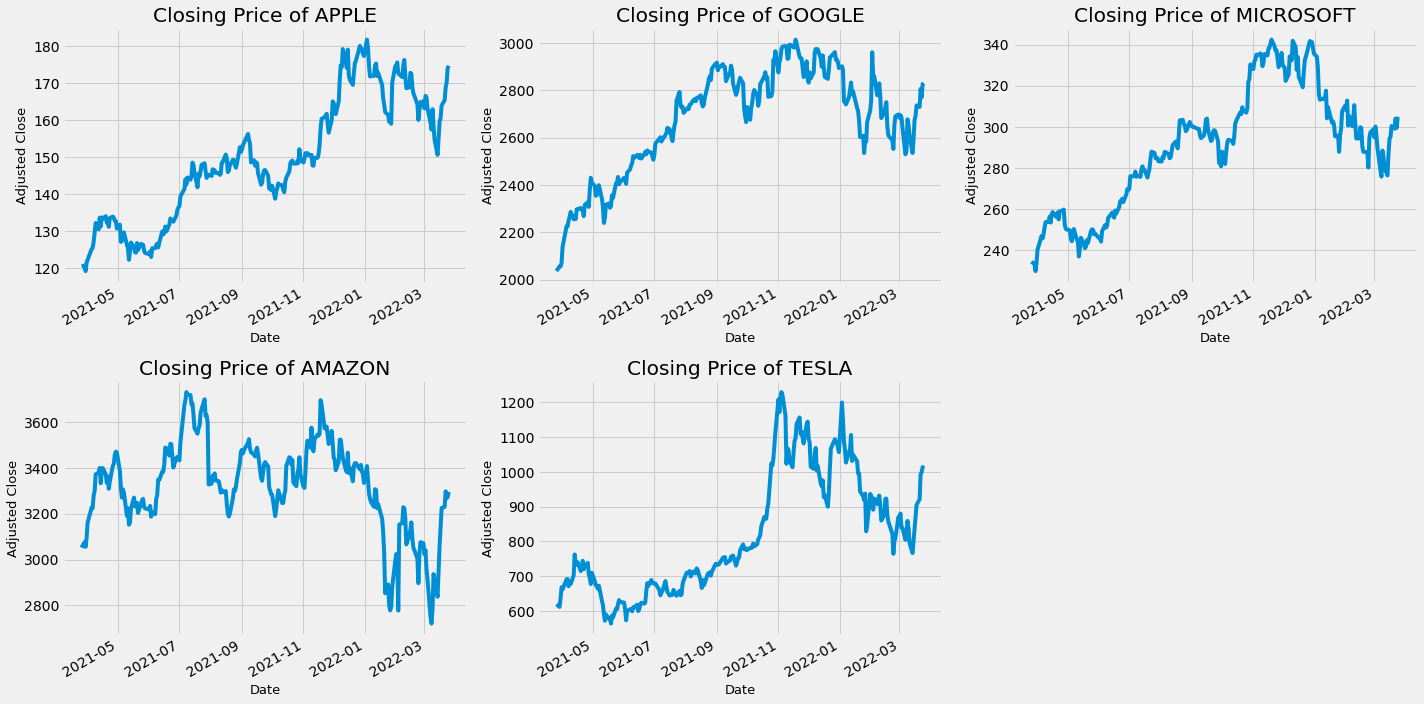

In [7]:
#Visualize Closing Price History(Adjusted Closing Price is used as it is a better indicator)
plt.figure(figsize=(20,10))

for i, comp in enumerate(company_list,1):
    plt.subplot(2, 3, i)
    comp['Adj Close'].plot()
    plt.title('Closing Price of ' + company_name[i-1])
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Adjusted Close', fontsize=13)
    
plt.tight_layout()

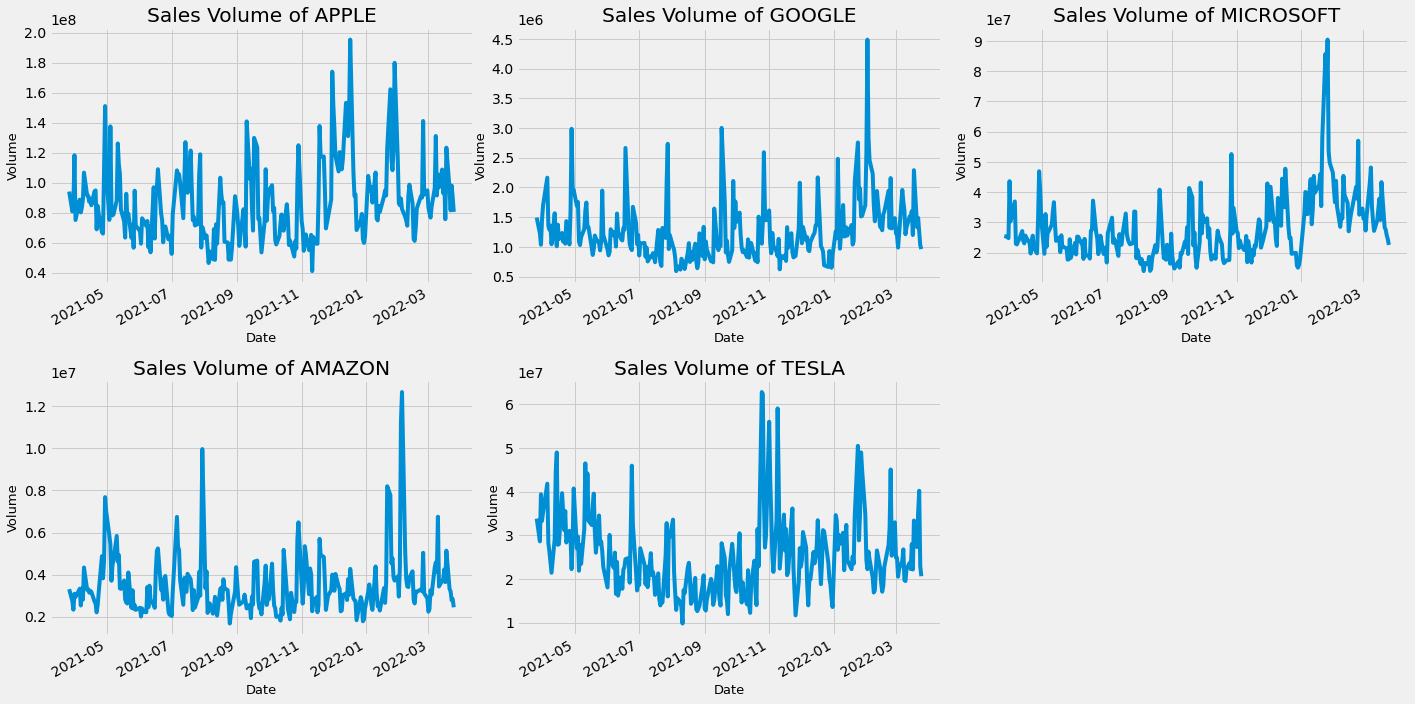

In [8]:
#Visualize Sales Volume History
plt.figure(figsize=(20,10))

for i, comp in enumerate(company_list,1):
    plt.subplot(2, 3, i)
    comp['Volume'].plot()
    plt.title('Sales Volume of ' + company_name[i-1])
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Volume', fontsize=13)
    
plt.tight_layout()

### Finding and Visualizing Moving Average

In [9]:
#Finding Moving Average and Adding to the DataFrame
ma_day = [10, 20, 30, 50]

for ma in ma_day:
    for comp in company_list:
        column_name = f"MA for {ma} days"
        comp[column_name] = comp['Adj Close'].rolling(ma).mean()

In [10]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name',
       'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days'],
      dtype='object')

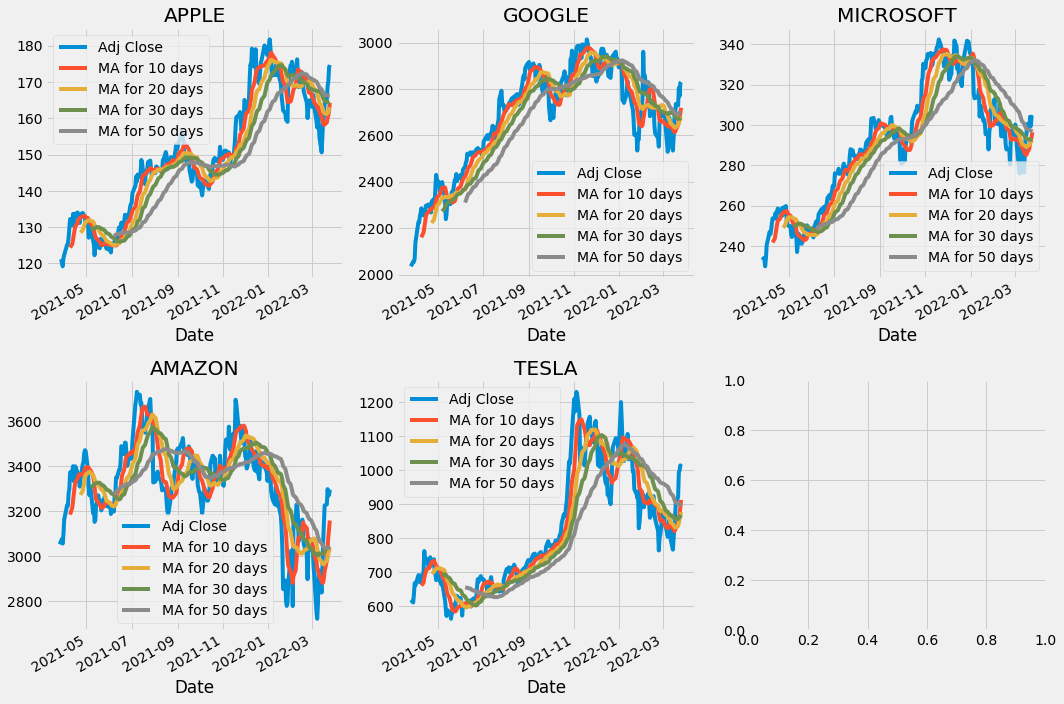

In [11]:
#Visualize Moving Average
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

### Creating DataFrame for each company

In [12]:
import pandas_datareader as pdr

end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
data_source = 'yahoo'
df_aapl = pdr.DataReader('AAPL', data_source, start, end)
df_goog = pdr.DataReader('GOOG', data_source, start, end)
df_msft = pdr.DataReader('MSFT', data_source, start, end)
df_amzn = pdr.DataReader('AMZN', data_source, start, end)
df_tsla = pdr.DataReader('TSLA', data_source, start, end)
df_aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-03-26,21.683929,21.259287,21.421070,21.677856,595742000.0,18.562195
2012-03-27,22.010000,21.645000,21.649286,21.945715,607129600.0,18.791552
2012-03-28,22.194643,21.796785,22.084999,22.057858,655460400.0,18.887579
2012-03-29,22.020000,21.686787,21.885000,21.780714,608238400.0,18.650269
2012-03-30,21.805714,21.355000,21.741785,21.412500,731038000.0,18.334976
...,...,...,...,...,...,...
2022-03-22,169.419998,164.910004,165.509995,168.820007,81532000.0,168.820007
2022-03-23,172.639999,167.649994,167.990005,170.210007,98062700.0,170.210007
2022-03-24,174.139999,170.210007,171.059998,174.070007,90131400.0,174.070007


### Prediction using LSTM and GRU

#### Sample Prediction Model for AAPL

In [13]:
#Create Dataframe with only "Adj Close"
data = df_aapl.filter(['Adj Close'])

#Convert the DataFrame to numpy array
dataset = data.values

#Get the Number of Rows to Train
train_len = int(np.ceil(len(dataset)*0.8))
train_len

2016

In [14]:
#Scale the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03797629],
       [0.03932815],
       [0.03989416],
       ...,
       [0.95456546],
       [0.95839663],
       [0.95839663]])

#### Creating Train Dataset

In [15]:
#Create Train Dataset
train_data = scaled_data[0:train_len, :]

#Split into x_train and y_train
x_train = []
y_train = []

#Change k value later to adjust accuracy
k = 60
for i in range(k, len(train_data)):
    x_train.append(train_data[(i-k):i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data(don't understand what this is for)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape[1]

#### Building LSTM Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 80s 39ms/step - loss: 2.5403e-04


In [17]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
mse = np.mean(((predictions - y_test) ** 2))

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 9.160558046228655, MSE = 83.91582371832453, MAE = 8.016042743478096


<ipython-input-18-21035df61f4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


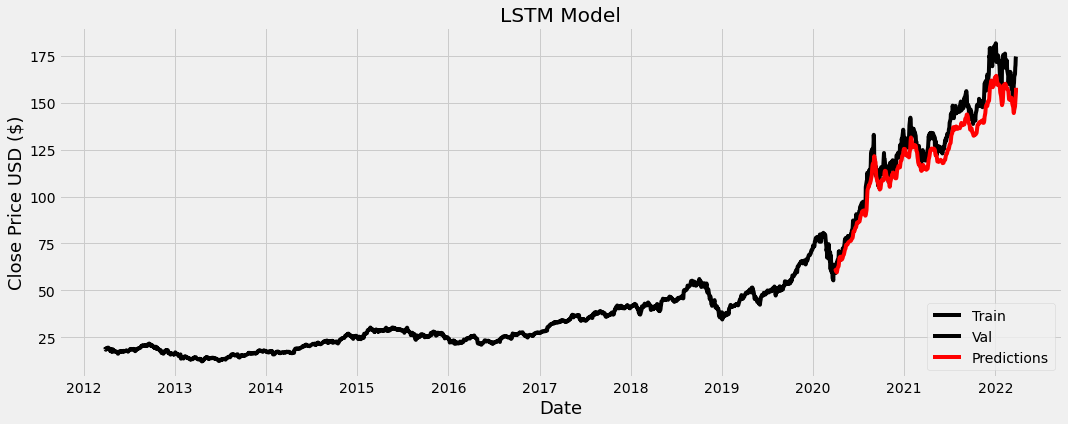

In [18]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Adj Close'])
#plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
valid

,Adj Close,Predictions
Date,,
2020-03-31,62.710781,60.433353
2020-04-01,59.411125,60.924812
2020-04-02,60.402500,60.564693
2020-04-03,59.534428,60.149151
2020-04-06,64.728058,59.611324
...,...,...
2022-03-22,168.820007,149.900818
2022-03-23,170.210007,152.025558
2022-03-24,174.070007,153.986755


In [20]:
pred = valid['Predictions']
aapl_lstm = pred[valid.shape[0]-1]
aapl_lstm

158.02531

#### Building GRU Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, GRU

# Build the GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 84s 41ms/step - loss: 1.9843e-04


In [22]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error as mean_sq_error
mse = mean_sq_error(y_test, predictions)

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 3.0539106739566013, MSE = 9.326370404506063, MAE = 2.286821945524121


<ipython-input-23-d0328d19defc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


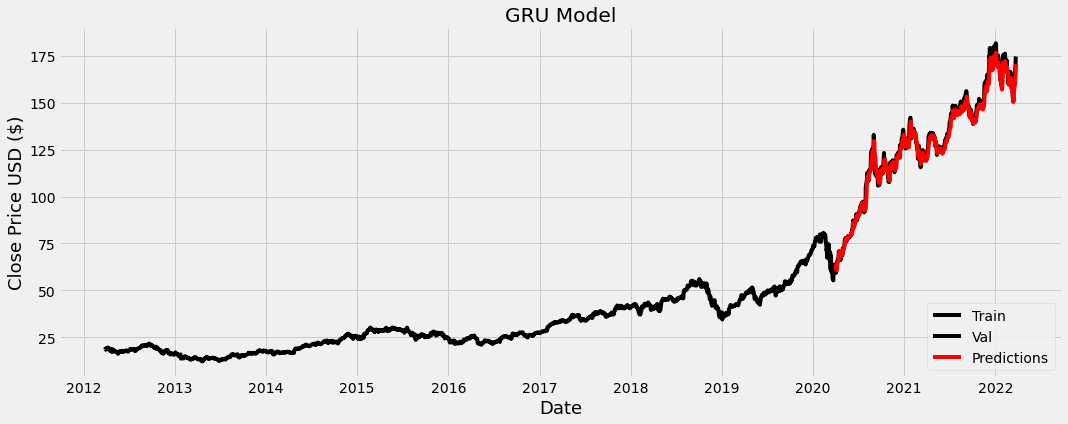

In [23]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
pred = valid['Predictions']
aapl_gru = pred[valid.shape[0]-1]
aapl_gru

170.80057

### Sample Prediction Model for GOOG

In [134]:
#Create Dataframe with only "Adj Close"
data = df_goog.filter(['Adj Close'])

#Convert the DataFrame to numpy array
dataset = data.values

#Get the Number of Rows to Train
train_len = int(np.ceil(len(dataset)*0.8))

#Scale the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create Train Dataset
train_data = scaled_data[0:train_len, :]

#Split into x_train and y_train
x_train = []
y_train = []

#Change k value later to adjust accuracy
k = 60
for i in range(k, len(train_data)):
    x_train.append(train_data[(i-k):i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data(don't understand what this is for)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape[1]

#### LSTM for GOOG

In [135]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 84s 41ms/step - loss: 3.1753e-04


In [136]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
mse = np.mean(((predictions - y_test) ** 2))

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 92.00567069443188, MSE = 8465.043439932242, MAE = 73.32603791314612


<ipython-input-137-21035df61f4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


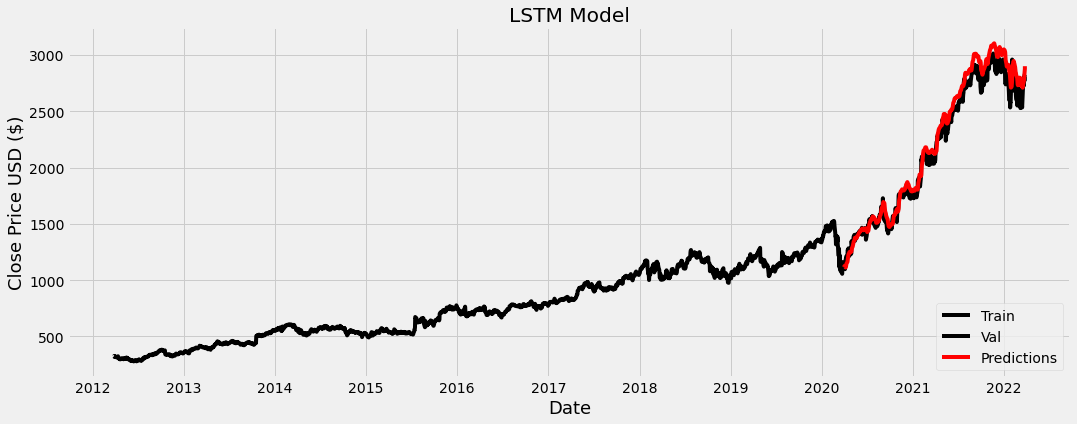

In [137]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Adj Close'])
#plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [138]:
pred = valid['Predictions']
goog_lstm = pred[valid.shape[0]-1]
goog_lstm

2901.562

#### GRU for GOOG

In [30]:
from keras.models import Sequential
from keras.layers import Dense, GRU

# Build the GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 127s 61ms/step - loss: 2.5737e-04


In [31]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error as mean_sq_error
mse = mean_sq_error(y_test, predictions)

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 47.02571224475366, MSE = 2211.417612126375, MAE = 35.55291420422776


<ipython-input-32-d0328d19defc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


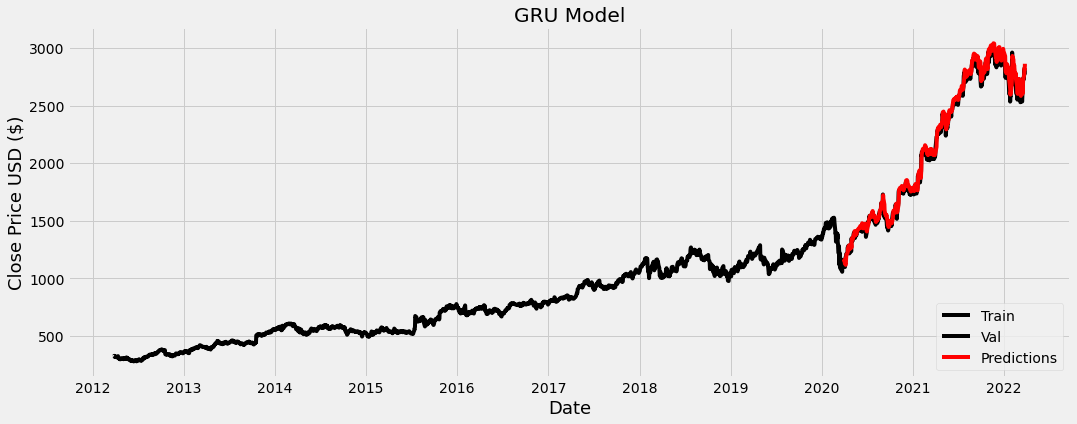

In [32]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
pred = valid['Predictions']
goog_gru = pred[valid.shape[0]-1]
goog_gru

2863.334

### Sample Prediction Model for MSFT

In [34]:
#Create Dataframe with only "Adj Close"
data = df_msft.filter(['Adj Close'])

#Convert the DataFrame to numpy array
dataset = data.values

#Get the Number of Rows to Train
train_len = int(np.ceil(len(dataset)*0.8))

#Scale the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create Train Dataset
train_data = scaled_data[0:train_len, :]

#Split into x_train and y_train
x_train = []
y_train = []

#Change k value later to adjust accuracy
k = 60
for i in range(k, len(train_data)):
    x_train.append(train_data[(i-k):i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data(don't understand what this is for)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape[1]

#### LSTM for MSFT

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 115s 56ms/step - loss: 3.3444e-04


In [36]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
mse = np.mean(((predictions - y_test) ** 2))

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 6.387565389077446, MSE = 40.80099159974011, MAE = 5.033550679565187


<ipython-input-37-21035df61f4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


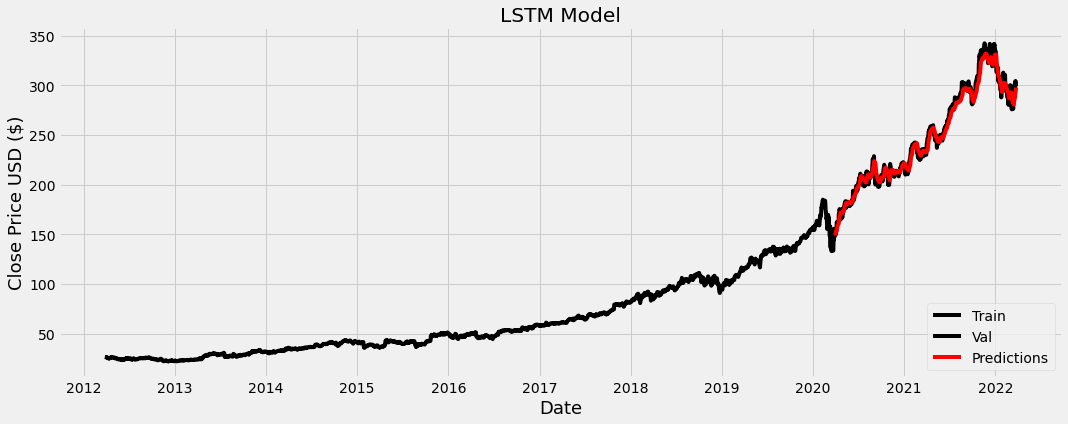

In [37]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Adj Close'])
#plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
pred = valid['Predictions']
msft_lstm = pred[valid.shape[0]-1]
msft_lstm

297.8313

#### GRU for MSFT

In [39]:
from keras.models import Sequential
from keras.layers import Dense, GRU

# Build the GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 95s 45ms/step - loss: 2.4092e-04


In [40]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error as mean_sq_error
mse = mean_sq_error(y_test, predictions)

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 5.384573688762964, MSE = 28.993633809718386, MAE = 4.299982969613957


<ipython-input-41-d0328d19defc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


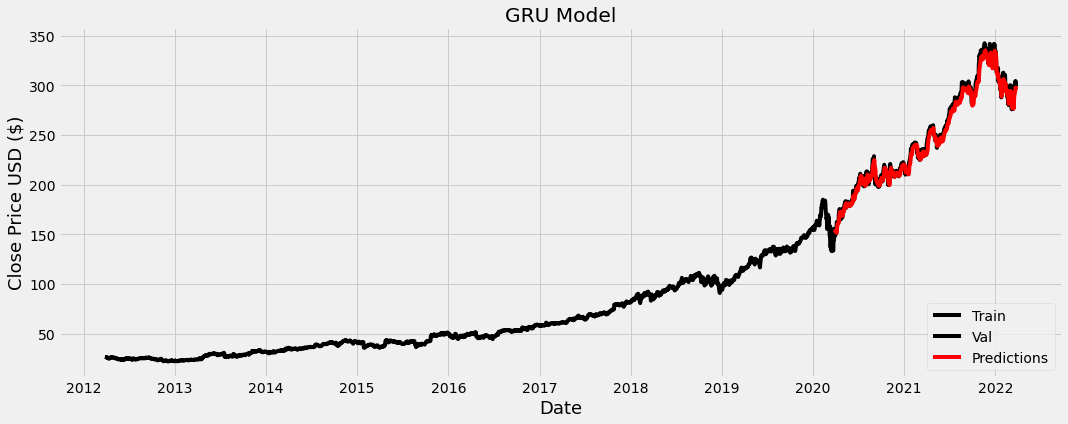

In [41]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
pred = valid['Predictions']
msft_gru = pred[valid.shape[0]-1]
msft_gru

299.29742

### Sample Prediction Model for AMZN

In [43]:
#Create Dataframe with only "Adj Close"
data = df_amzn.filter(['Adj Close'])

#Convert the DataFrame to numpy array
dataset = data.values

#Get the Number of Rows to Train
train_len = int(np.ceil(len(dataset)*0.8))

#Scale the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create Train Dataset
train_data = scaled_data[0:train_len, :]

#Split into x_train and y_train
x_train = []
y_train = []

#Change k value later to adjust accuracy
k = 60
for i in range(k, len(train_data)):
    x_train.append(train_data[(i-k):i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data(don't understand what this is for)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape[1]

#### LSTM for AMZN

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 87s 43ms/step - loss: 6.7188e-04


In [45]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
mse = np.mean(((predictions - y_test) ** 2))

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 96.97840937389347, MSE = 9404.811884690469, MAE = 74.57466626025099


<ipython-input-46-21035df61f4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


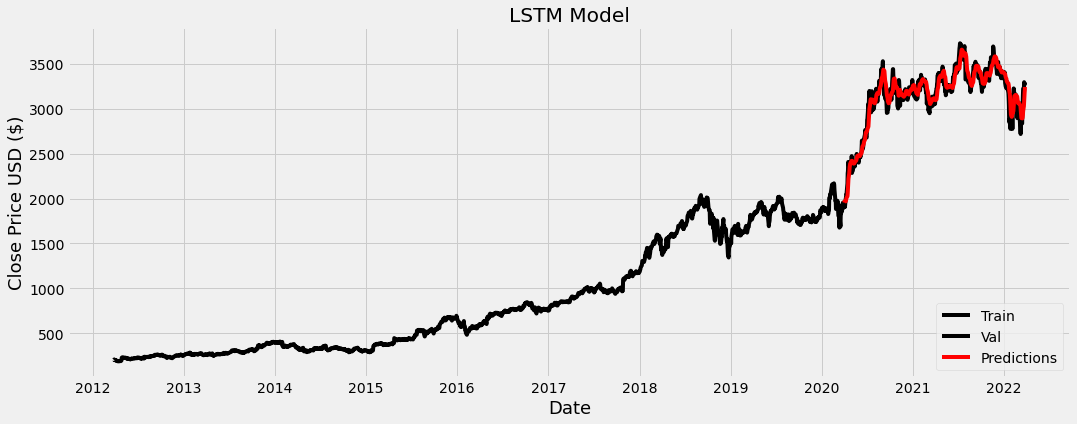

In [46]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Adj Close'])
#plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
pred = valid['Predictions']
amzn_lstm = pred[valid.shape[0]-1]
amzn_lstm

3244.8525

#### GRU for AMZN

In [48]:
from keras.models import Sequential
from keras.layers import Dense, GRU

# Build the GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 74s 36ms/step - loss: 5.3922e-04


In [49]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error as mean_sq_error
mse = mean_sq_error(y_test, predictions)

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 156.8555373911851, MSE = 24603.659610277467, MAE = 143.30076984382765


<ipython-input-50-d0328d19defc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


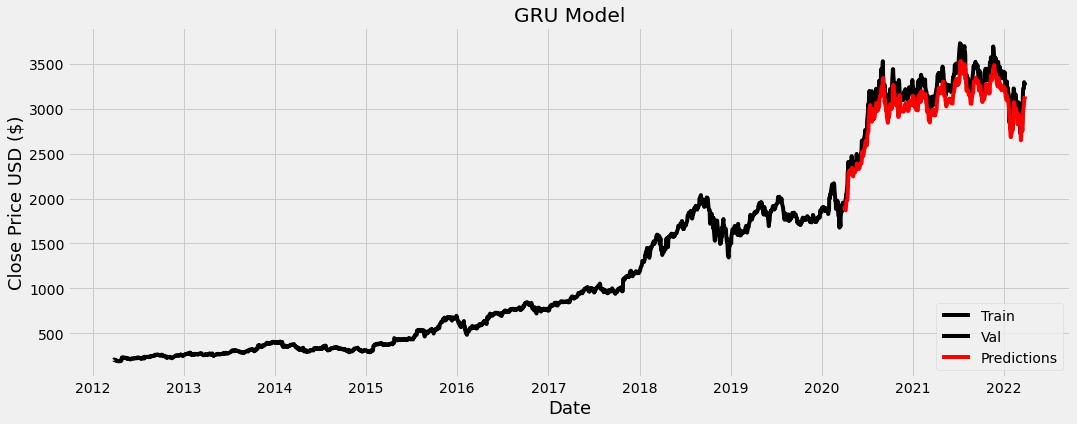

In [50]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [51]:
pred = valid['Predictions']
amzn_gru = pred[valid.shape[0]-1]
amzn_gru

3138.7656

### Sample Prediction Model for TSLA

In [52]:
#Create Dataframe with only "Adj Close"
data = df_tsla.filter(['Adj Close'])

#Convert the DataFrame to numpy array
dataset = data.values

#Get the Number of Rows to Train
train_len = int(np.ceil(len(dataset)*0.8))

#Scale the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create Train Dataset
train_data = scaled_data[0:train_len, :]

#Split into x_train and y_train
x_train = []
y_train = []

#Change k value later to adjust accuracy
k = 60
for i in range(k, len(train_data)):
    x_train.append(train_data[(i-k):i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data(don't understand what this is for)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape[1]

#### LSTM for TSLA

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 88s 43ms/step - loss: 4.9290e-05


In [54]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
mse = np.mean(((predictions - y_test) ** 2))

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 52.98747351287615, MSE = 2807.6723492777514, MAE = 38.5422299576564


<ipython-input-55-21035df61f4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


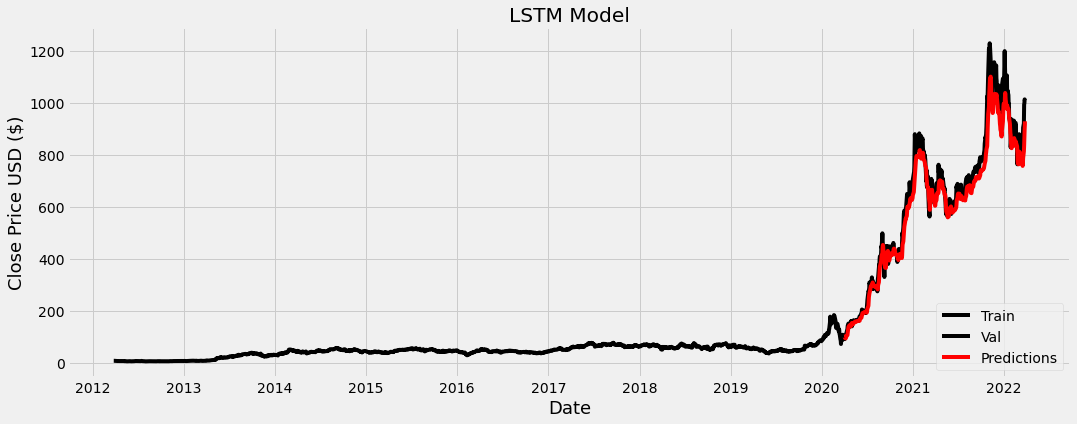

In [55]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Adj Close'])
#plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
pred = valid['Predictions']
tsla_lstm = pred[valid.shape[0]-1]
tsla_lstm

929.58514

#### GRU for TSLA

In [57]:
from keras.models import Sequential
from keras.layers import Dense, GRU

# Build the GRU model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1956/1956 [==============================] - 70s 34ms/step - loss: 4.7452e-05


In [58]:
# Create the testing data set
test_data = scaled_data[train_len - 60: , :]

# Create the data sets x_test and y_test
#Change k value later to adjust accuracy
k = 60
x_test = []
y_test = dataset[train_len:, :]
for i in range(k, len(test_data)):
    x_test.append(test_data[(i-k):i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Get the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error as mean_sq_error
mse = mean_sq_error(y_test, predictions)

# Get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mean_abs_error
mae = mean_abs_error(y_test, predictions)

print('RMSE = '+str(rmse)+", MSE = "+str(mse)+", MAE = "+str(mae))

RMSE = 30.576923963455418, MSE = 934.9482790669341, MAE = 21.800971120299685


<ipython-input-59-d0328d19defc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


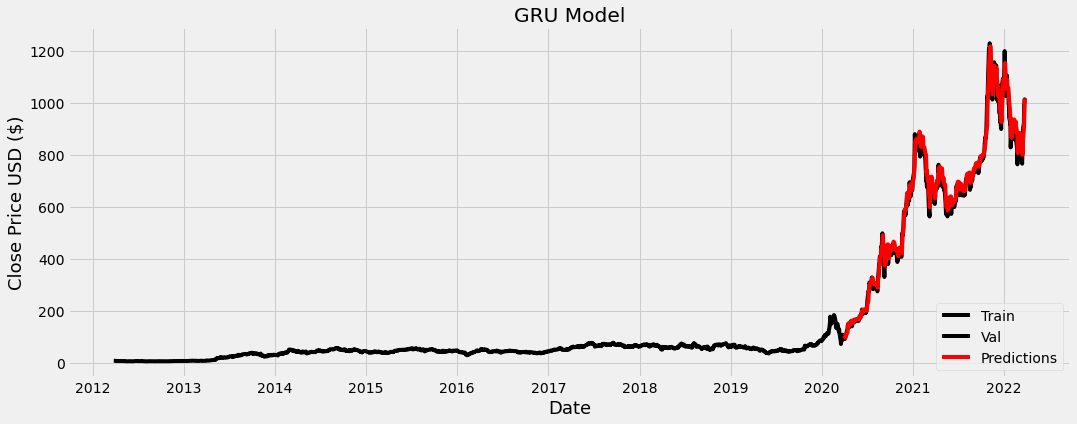

In [59]:
# Plot the data
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "black")
plt.plot(valid['Predictions'], color = "red")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
pred = valid['Predictions']
tsla_gru = pred[valid.shape[0]-1]
tsla_gru

1018.1299

### Predicted Values for LSTM and GRU + Real Value in DataFrame

In [139]:
preds_lstm = [aapl_lstm, goog_lstm, msft_lstm, amzn_lstm, tsla_lstm]
lstm_data = {'Name': stock_list, 'Prediction': preds_lstm}
lstm_pred = pd.DataFrame(lstm_data)
lstm_pred

,Name,Prediction
0,AAPL,158.025314
1,GOOG,2901.562012
2,MSFT,297.831299
3,AMZN,3244.852539
4,TSLA,929.585144


In [140]:
preds_gru = [aapl_gru, goog_gru, msft_gru, amzn_gru, tsla_gru]
gru_data = {'Name': stock_list, 'Prediction': preds_gru}
gru_pred = pd.DataFrame(gru_data)
gru_pred

,Name,Prediction
0,AAPL,170.800568
1,GOOG,2863.333984
2,MSFT,299.297424
3,AMZN,3138.765625
4,TSLA,1018.129883


In [141]:
aapl_real = df_aapl['Adj Close'][df_aapl.shape[0]-1]
goog_real = df_goog['Adj Close'][df_aapl.shape[0]-1]
msft_real = df_msft['Adj Close'][df_aapl.shape[0]-1]
amzn_real = df_amzn['Adj Close'][df_aapl.shape[0]-1]
tsla_real = df_tsla['Adj Close'][df_aapl.shape[0]-1]
reals = [aapl_real, goog_real, msft_real, amzn_real, tsla_real]
real_data = {'Name': stock_list ,'Adj Close': reals}
df_real_today = pd.DataFrame(real_data)
df_real_today

,Name,Adj Close
0,AAPL,174.720001
1,GOOG,2830.429932
2,MSFT,303.679993
3,AMZN,3295.469971
4,TSLA,1010.640015


In [142]:
final = {'Name': stock_list, 'LSTM Predictions': preds_lstm, 'GRU Predictions': preds_gru, 'Actual Value': reals}
comb = pd.DataFrame(final)
comb

,Name,LSTM Predictions,GRU Predictions,Actual Value
0,AAPL,158.025314,170.800568,174.720001
1,GOOG,2901.562012,2863.333984,2830.429932
2,MSFT,297.831299,299.297424,303.679993
3,AMZN,3244.852539,3138.765625,3295.469971
4,TSLA,929.585144,1018.129883,1010.640015


### Calculating Intrinsic Value of a stock using Financial Metric Formula

In [147]:
#calculate intrinsic value using actual value
#EPS, G, PE Ratio values obtained from Macrotrends, Yahoo Finance Analysis Tab and YCharts Data Tab respectively

# In the order of AAPL, GOOG, MSFT, AMZN, TSLA(Based: March 27 2022)
EPS = [5.61, 112.2, 8.05, 64.81, 4.9] #annaul earning per share ratio of 2021(last year) from Macrotrends
G = [0.1485, 0.20, 0.174, 0.348, 0.298] #expected annual growth rate from "Growth Estimates: Next 5 Years (per annum)"
PER = [28.93, 25.22, 32.34, 50.87, 206.25] #P/E ratio from YCharts

i_val = []

for i, j, k in zip(EPS, G, PER):
    intrinsic_val = i*(1+j)*k
    i_val.append(intrinsic_val)

i_val

[186.39844905,
 3395.6207999999997,
 305.63563800000003,
 4444.2005756,
 1311.7912500000002]

In [144]:
mos_lstm = []
mos_gru = []
mos_real = []
    
for i,j in zip(preds_lstm, i_val):
    ms = ((i-j)/i)*100
    mos_lstm.append(ms)
    
for i,j in zip(preds_gru, i_val):
    ms = ((i-j)/i)*100
    mos_gru.append(ms)
    
for i,j in zip(reals, i_val):
    ms = ((i-j)/i)*100
    mos_real.append(ms)

In [145]:
final = {'Name': stock_list, 'LSTM Predictions': preds_lstm, 'GRU Predictions': preds_gru, 
         'Actual Value': reals, 'Intrinsic Value': i_val, 
         'Margin of Safety(LSTM)': mos_lstm, 'Margin of Safety(GRU)': mos_gru, 'Margin of Safety(Actual)': mos_real}
comb = pd.DataFrame(final)
comb

,Name,LSTM Predictions,GRU Predictions,Actual Value,Intrinsic Value,Margin of Safety(LSTM),Margin of Safety(GRU),Margin of Safety(Actual)
0,AAPL,158.025314,170.800568,174.720001,186.398449,-17.954804,-9.132219,-6.684093
1,GOOG,2901.562012,2863.333984,2830.429932,3395.620800,-17.027339,-18.589757,-19.968375
2,MSFT,297.831299,299.297424,303.679993,305.635638,-2.620389,-2.117697,-0.643982
3,AMZN,3244.852539,3138.765625,3295.469971,4444.200576,-36.961557,-41.590711,-34.857869
4,TSLA,929.585144,1018.129883,1010.640015,1311.791250,-41.115772,-28.843213,-29.798072


### Rankings based on Margin of Safety

In [148]:
#Positive MoS means Overpriced Stock, Negative MoS means Underpriced Stock
#Since all values are negative, the more negative, the better stock to invest in
#(if all are positive, the less positive, the better stock to invest in)
actual = ['AMAZON', 'TESLA', 'GOOGLE', 'APPLE', 'MICROSOFT']
lstm = ['TESLA', 'AMAZON', 'APPLE', 'GOOGLE', 'MICROSOFT']
gru = ['AMAZON', 'TESLA', 'GOOGLE', 'APPLE', 'MICROSOFT']
rank = {'Rank': [1,2,3,4,5], 'Actual': actual, 'LSTM': lstm, 'GRU': gru}
pd.DataFrame(rank)

,Rank,Actual,LSTM,GRU
0,1,AMAZON,TESLA,AMAZON
1,2,TESLA,AMAZON,TESLA
2,3,GOOGLE,APPLE,GOOGLE
3,4,APPLE,GOOGLE,APPLE
4,5,MICROSOFT,MICROSOFT,MICROSOFT
